# CLASE 3.1: PRIMEROS PASOS EN MATPLOTLIB.
---

## Introducción.
Cambiaremos un poco la directriz de los contenidos que hemos estado abordando hasta este momento y haremos un entretenido tour por una de las herramientas más poderosas de Python para la visualización de información. **Matplotlib** es una librería de visualización de datos construida fundamentalmente sobre arreglos de **Numpy**, con el objetivo de generar gráficos con una interfaz similar a la de Matlab® (de ahí su particular nombre).

Antes de navegar en profundidad en los detalles relativos a **Matplotlib**, hay algunas cosas puntuales y muy útiles que deberíamos saber previo a su utilización. De partida, su importación se realiza de la misma forma que cualquier otra librería, con la diferencia de que, en la práctica, nos limitaremos casi siempre al uso del submódulo de creación de elementos gráficos conocido como `pyplot`. Tanto **Matplotlib** como `pyplot` tienen prefijos universalmente conocidos para su especificación en la práctica, y son los que, de hecho, utilizaremos en este curso: `mpl` y `plt`.

De esta manera, tenemos las siguientes opciones a la hora de iniciar nuestra sesión interactiva en Python cuando queramos hacer uso de esta librería:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

Es posible setear varios **estilos de visualización** para la interfaz `pyplot` haciendo uso de la instrucción `plt.style.use("style")`, donde `"style"` define el tipo de estilo a definir para nuestros gráficos. Por ejemplo, con plt.style.use("bmh"), obtenemos la primera de las referencias de estilos que se detallan en la Fig. (1.1). Existen varias plantillas de estilos disponibles que pueden consultarse rápidamente en la [documentación oficial](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) de **Matplotlib**.

<p style="text-align: center;"><img src="figures/fig_1_1.png" width="1000"></p>
<p style="text-align: center;">Fig. (1.1): Algunos ejemplos de plantillas de estilos en Matplotlib (fuente: Documentación oficial de Matplotlib)</p>

No nos limitaremos a **Matplotlib**. También veremos otras librerías de graficación conocidas por su versatilidad y, sobretodo, por su interactividad directa con el usuario, gracias a su soporte de imágenes en .HTML. La ventaja de la reportabilidad en .HTML resulta obvia, ya que podremos jugar con nuestros gráficos en tiempo real y, de esa manera, mostrar información a escalas imposibles de lograr con otras plataformas (como MS Excel®). Un ejemplo de librería de graficación interactiva es **Plotly**, la que estudiaremos más adelante.

## Guardado de figuras.
Una característica muy útil de **Matplotlib** es su capacidad de guardar las respectivas figuras que generemos en una amplia variedad de formatos. Podemos guardar cualquier figura que generemos usando la función `plt.savefig()`. Así, una vez construido un gráfico y asignado a una figura, su almacenamiento requerirá únicamente de una instrucción del tipo:

`plt.savefig("nombre_de_la_figura.png")`

Una vez realizada la instrucción anterior, se generará el archivo `my_plot.png` en el directorio de trabajo que estemos utilizando en ese momento. Para confirmar que este archivo contiene nuestra figura, podemos utilizar el objeto `Image` del módulo **IPython** para mostrar en pantalla los contenidos de este archivo:

`from IPython.display import Image`

`Image("nombre_de_la_figura.png")`

Para el caso de la función `plt.savefig()`, el formato de archivo resultante es inferido a partir de la extensión definida en el nombre del archivo. Dependiendo del backend que hayamos instalado para trabajar, habrá unos u otros formatos disponibles. Podemos encontrar la lista de formatos de imagen soportados por nuestro sistema usando el método descrito por el siguiente código sobre la figura que hayamos creado (normalmente, tal creación parte con la función `plt.figure()`, dependiendo del **tipo de interfaz** que utilicemos en **Matplotlib** (esto es algo que veremos un poco más adelante):

<IPython.core.display.Javascript object>


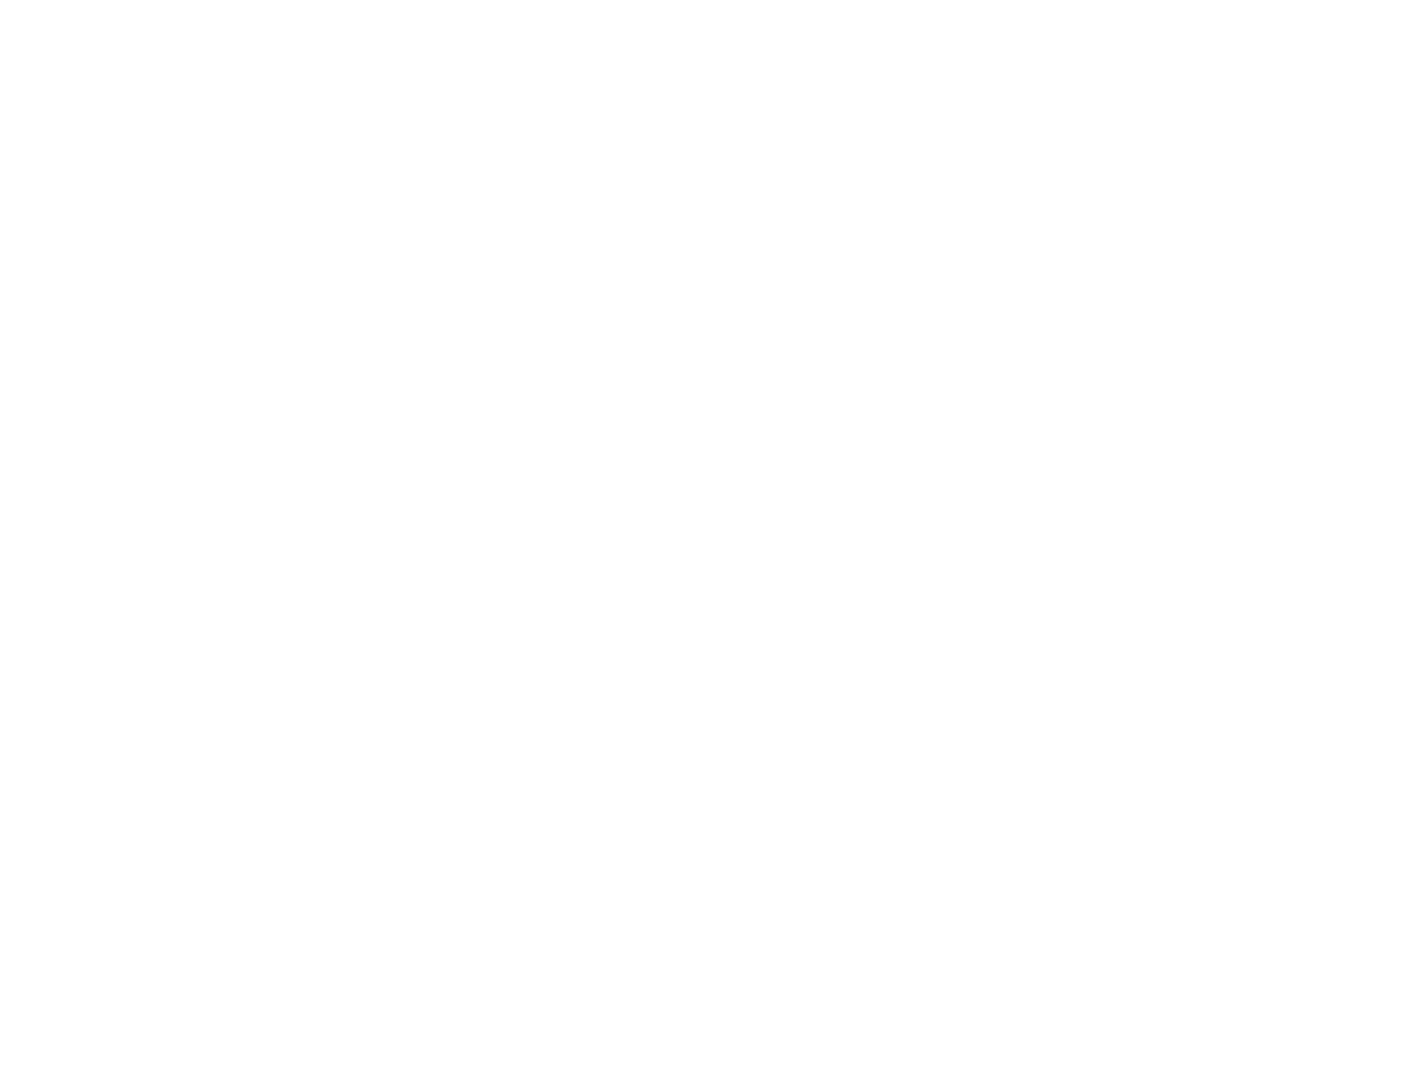

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

In [3]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

## Setting de parámetros por defecto.
**Matplotlib** dispone de una configuración en tiempo de ejecución (*runtime configuration*) por defecto que establece ciertos parámetros relativos a la estructura de las figuras que queramos construir, siempre que nosotros no especifiquemos tales parámetros en tales construcciones. Dichos parámetros por defecto incluyen la resolución de nuestras figuras (densidad de puntos por pixel o `dpi`), tamaños de fuente, relaciones de ancho por alto de las mismas, entre muchos otros.

Por ejemplo, para definir la resolución por defecto de nuestras figuras en términos de su `dpi`, podemos usar el setting de parámetros por defecto de `pyplot`, definido como `plt.rcParams[]`, como sigue:

In [4]:
# Setting de resolución en 100 puntos por pixel.
plt.rcParams["figure.dpi"] = 100

## Interfaz de construcción de gráficos.

### Interfaz de tipo Matlab.
Como comentamos al principio, **Matplotlib** fue originalmente escrito como una alternativa de visualización de datos en Python para usuarios de Matlab, y mucha de su sintaxis refleja este hecho. Las herramientas con estilo tipo Matlab están contenidas en la interfaz `pyplot`. Por ejemplo, el siguiente código probablemente será familiar para los usuarios de Matlab, el cual nos permite construir una grilla de dos filas, cada una de las cuales contiene un gráfico:

In [5]:
# Partimos importando Numpy, para generar la data que vamos a graficar.
import numpy as np

<IPython.core.display.Javascript object>


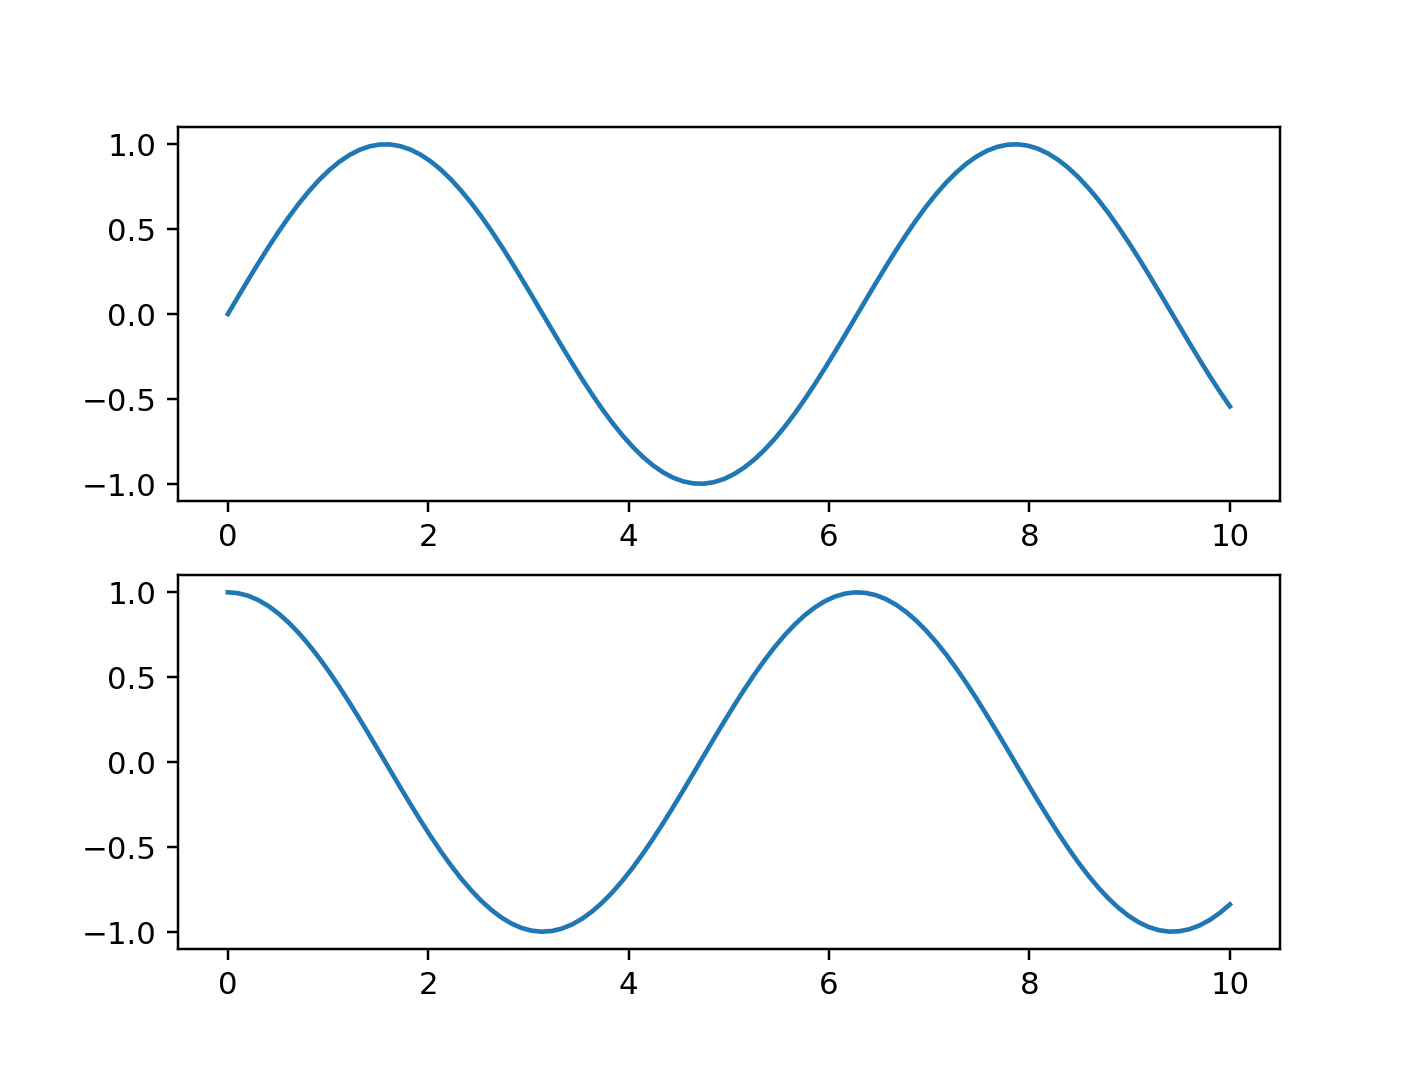

In [6]:
# Toda figura en esta interfaz parte con la función plt.figure()
plt.figure()

# Creamos algo de data.
x = np.linspace(start=0, stop=10, num=100)

# Creamos el primero de dos paneles y seteamos el eje actual de graficación.
plt.subplot(2, 1, 1) # (fila, columna, número de panel).
plt.plot(x, np.sin(x))

# Creamos el segundo panel y seteamos el eje actual de graficación.
plt.subplot(2, 1, 2) # (fila, columna, número de panel).
plt.plot(x, np.cos(x));

Es importante notar que esta interfaz es de estado: Mantiene la trazabilidad de nuestra figura actual y sus ejes de graficación, los cuales son todos comandos aplicados mediante la interfaz `pyplot` (`plt`). Podemos obtener una referencia de ambos usando las rutinas `plt.gcf()` (“get current figure”) y `plt.gca()` (“get current axes”)

Si bien esta interfaz es muy útil, no está exentade problemas. Por ejemplo, una vez que creamos el segundo panel ¿Cómo podemos devolvernos y añadir algo al siguiente panel? Con la interfaz de tipo Matlab es posible hacerlo, pero es un tanto nebuloso y complicado. Afortunadamente, hay una mejor forma de proceder.

### Interfaz orientada a objetos.
La interfaz orientada a objetos (IOO) está disponible para situaciones un tanto más complicadas, y cuando queremos tener un mayor control sobre nuestra figura. En vez de depender de alguna noción de una figura “activa” (o ejes), en este tipo de interfaz, las funciones de graficación son métodos aplicados sobre objetos explícitos: `Figure` y `Axes`. Para recrear el gráfico anterior usando este estilo de graficación, podemos hacer lo siguiente:

<IPython.core.display.Javascript object>


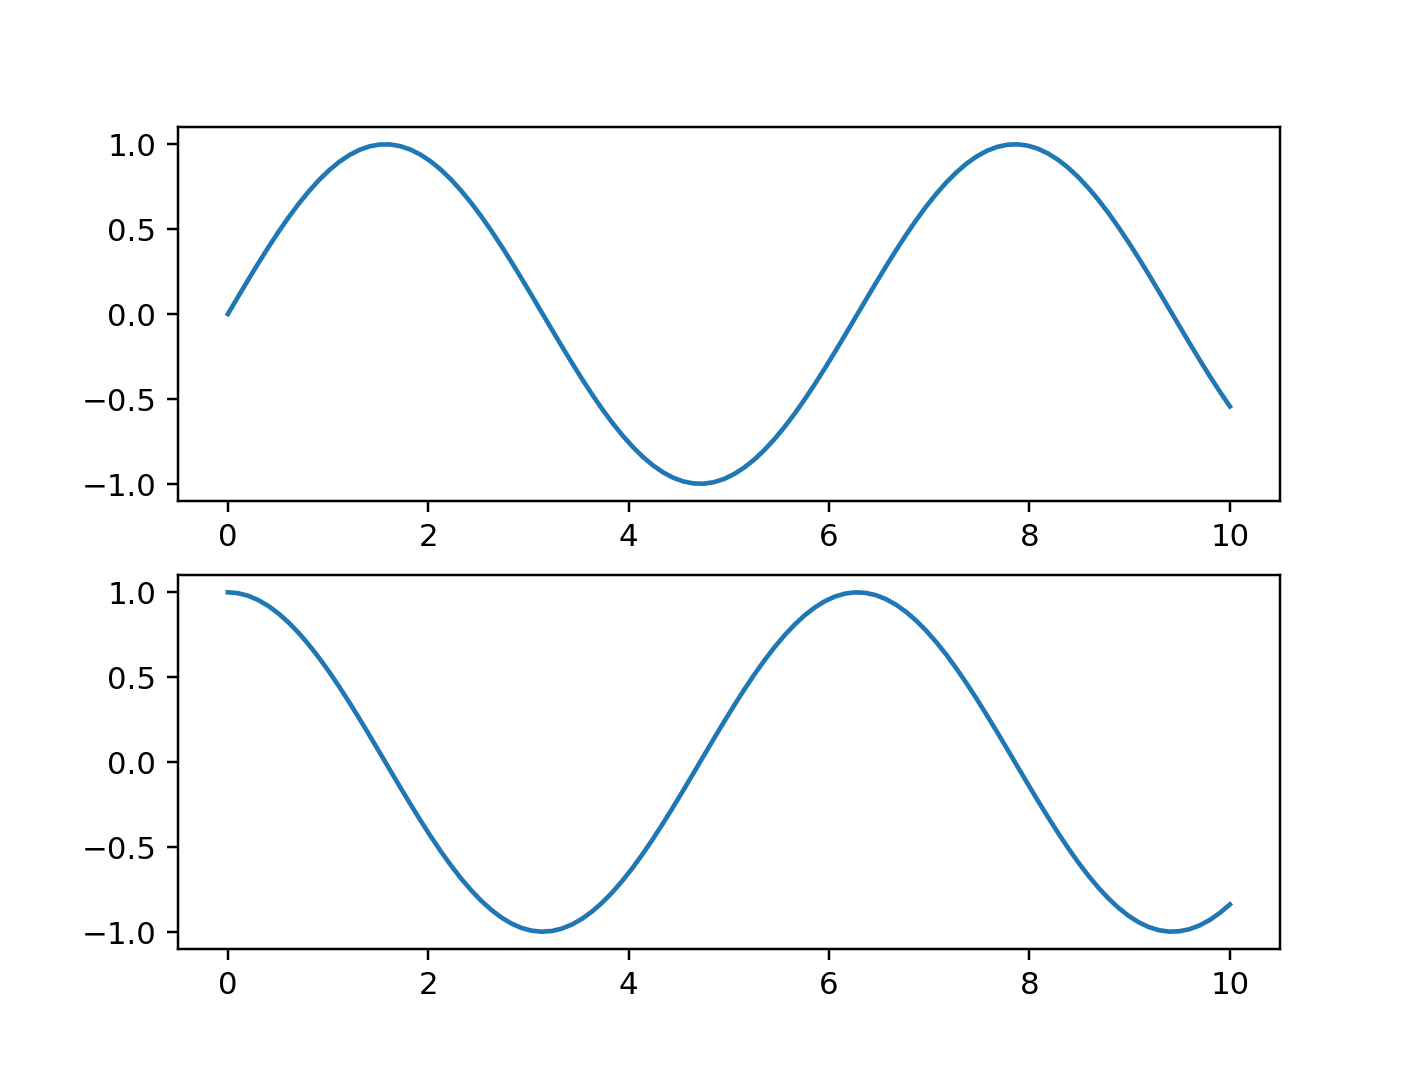

In [7]:
# Primero, creamos una grilla de gráficos.
# ax será un arreglo de dos objetos tipo Axes, y fig será el contenedor de la figura completa.
fig, ax = plt.subplots(nrows=2)

# Llamamos al método plot() sobre el objeto adecuado.
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Para gráficos más sencillos, la elección de cuál interfaz utilizar es, en general, un asunto de preferencia personal, pero el enfoque orientado a objetos puede convertirse en una necesidad a medida de que los gráficos se vuelven más y más complicados. A lo largo de nuestras clases, cambiaremos frecuentemente entre las interfaces tipo Matlab y orientada a objetos, dependiendo de qué nos conviene más en términos de la limpieza del código.

Muchas veces, los cambios será ínfimos. Pero haremos hincapié en el resultado y en algunas indicaciones claves que serán muy útiles a la hora de decidir qué interfaz escoger.

## Comentarios finales.
A través de nuestras clases, intentaremos ejemplificar todos los tipos posibles de gráficos usando diferentes plantillas y tipos de interfaz a fin de que podamos *soltar la mano* de manera agnóstica en relación a las diferentes posibilidades que nos ofrece **Matplotlib**.